# Contact Sales Data SVM Model

Evaluating the SVM model for text classification.

### Imports

In [16]:
import os
import sys
from dotenv import load_dotenv
load_dotenv()
sys.path.append(os.environ.get('base_path'))

In [17]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
    
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from utils.utils import find_file

from utils.dataframe_utils import read_pandas_csv_clean_columns_names
from utils.dataframe_utils import get_model_cross_validation
from utils.dataframe_utils import embeddings_to_columns
from utils.dataframe_utils import remove_outliers

from svm_utils import run_svm_on_dataset
from svm_utils import plot_svm

from imblearn.over_sampling import SMOTE

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
df = pd.read_pickle(find_file('contact_sales_dataset_preprocessed.pkl'))

In [19]:
df.head()

,input_pii_removed,status,sql_sql_name,num_tokens,embeddings,bert_based_embeddings,xlm_roberta_embeddings,topic_percentage,support_avg_term_score,sales_avg_term_score,...,language_iso639_1_sw,language_iso639_1_tl,language_iso639_1_tr,language_iso639_1_vi,language_iso639_1_xxx,language_iso639_1_zh-cn,dominant_topic_asap,dominant_topic_crm,dominant_topic_individual,dominant_topic_plan
0,Looking for an individual plan,Qualified,A-270959,-0.538398,"[-0.38701442, 0.15786593, -0.16941528, -0.2912...","[0.2068467, 0.16516614, 0.45383996, 0.27449363...","[-0.02190693, -0.026797922, 0.089087136, -0.00...",-1.272339,0.001854,1.097586,...,False,False,False,False,False,False,False,False,False,True
1,I'd like to know if you integrate with Talisma...,Qualified,A-270963,0.526845,"[-0.596565, -0.4335519, 0.19410405, -0.1173144...","[0.047533985, -0.117154315, -0.1686899, 0.0983...","[-0.031946417, -0.018111352, 0.13676293, 0.019...",-0.250049,0.287241,-0.954885,...,False,False,False,False,False,False,True,False,False,False
2,Hello - would like to learn how Lusha can help...,Unqualified,A-270966,1.517011,"[-0.1591934, -0.5191771, -0.20935884, -0.53277...","[-0.19207639, -0.061743535, 0.18255177, 0.1014...","[-0.07065672, -0.005259631, 0.21999939, 0.0728...",0.537949,1.467923,-0.652682,...,False,False,False,False,False,False,True,False,False,False
3,I want to know all your plans and pricing and ...,Unqualified,A-270968,1.294628,"[-0.56908244, -0.34940144, 0.036727037, -0.173...","[0.36898565, -0.025350176, -0.08601148, -0.058...","[-0.01630281, -0.0058537363, 0.101177774, 0.00...",1.586747,0.874033,-0.693662,...,False,False,False,False,False,False,False,False,False,True
4,Im trying to make my account but i get the err...,Unqualified,A-270969,1.727347,"[-0.14534937, -0.2384392, -0.13587786, 0.14170...","[-0.06293884, -0.4308237, 0.16223387, 0.034304...","[-0.026084527, 0.045595575, 0.291447, 0.039251...",2.068856,0.531643,-1.402690,...,False,False,False,False,False,False,False,False,False,True


In [23]:
df.drop(['input_pii_removed', 'ft'], axis=1, inplace=True)

In [24]:
df.shape

(9384, 88)

In [25]:
target_col = 'target'

In [26]:
# 384 embedding features added (total: 467)
df_embeddings = embeddings_to_columns(df, 'embeddings')
df_embeddings.drop(['bert_based_embeddings', 'xlm_roberta_embeddings'], axis=1, inplace=True)
print(f"Shape of df_embeddings: {df_embeddings.shape}")

# 768 embedding features added (total: 851)
df_bert_based_embeddings = embeddings_to_columns(df, 'bert_based_embeddings')
df_bert_based_embeddings.drop(['embeddings', 'xlm_roberta_embeddings'], axis=1, inplace=True)
print(f"Shape of df_bert_based_embeddings: {df_bert_based_embeddings.shape}")

# 1024 embedding features added (total: 1107)
df_xlm_roberta_embeddings = embeddings_to_columns(df, 'xlm_roberta_embeddings')
df_xlm_roberta_embeddings.drop(['embeddings', 'bert_based_embeddings'], axis=1, inplace=True)
print(f"Shape of df_xlm_roberta_embeddings: {df_xlm_roberta_embeddings.shape}")

Shape of df_embeddings: (9384, 469)
Shape of df_bert_based_embeddings: (9384, 853)
Shape of df_xlm_roberta_embeddings: (9384, 1109)


In [9]:
model_results_df = pd.DataFrame()

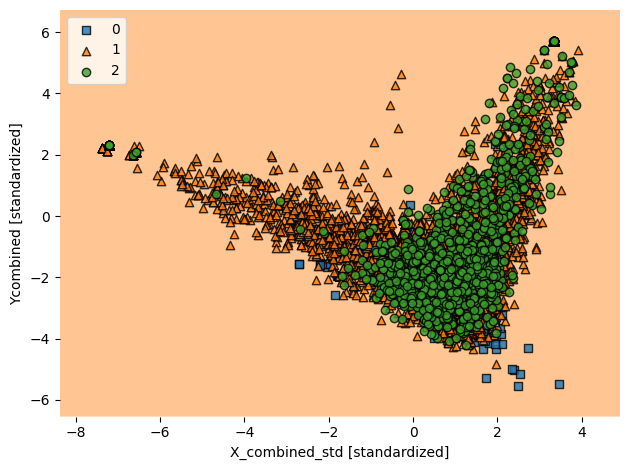

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [13]:
svm_overfit_params_rbf = {
    'C': 1e7,
    'kernel': 'rbf',
    'gamma': 1e8,
    'shrinking': True,
    'probability': False,
    'class_weight': None,
    'max_iter': 20000,
    'decision_function_shape': 'ovo',
}

model_results_df.loc['df_embeddings'] = run_svm_on_dataset(
    df_embeddings, 
    target_col, 
    clf_params=svm_overfit_params_rbf
)

model_results_df.loc['binary_SVM_overfit_rbf']